## Isolation Forest for Anomaly Detection
**Objective**: Understand and apply the Isolation Forest algorithm to identify anomalies in datasets.

### Task: Anomaly Detection in Financial Transactions
**Steps**:
1. Import Libraries
2. Load Dataset
3. Apply Isolation Forest
4. Visualize Anomalies

Synthetic Financial Transaction Dataset:
      amount  frequency  location_risk
0  55.425600          2       0.280108
1  59.633761          3       0.113792
2  37.691357          2       0.030238
3  45.393612          5       0.096193
4  46.078918          6       0.019986

Anomaly counts:
anomaly_label
Normal     274
Anomaly     56
Name: count, dtype: int64


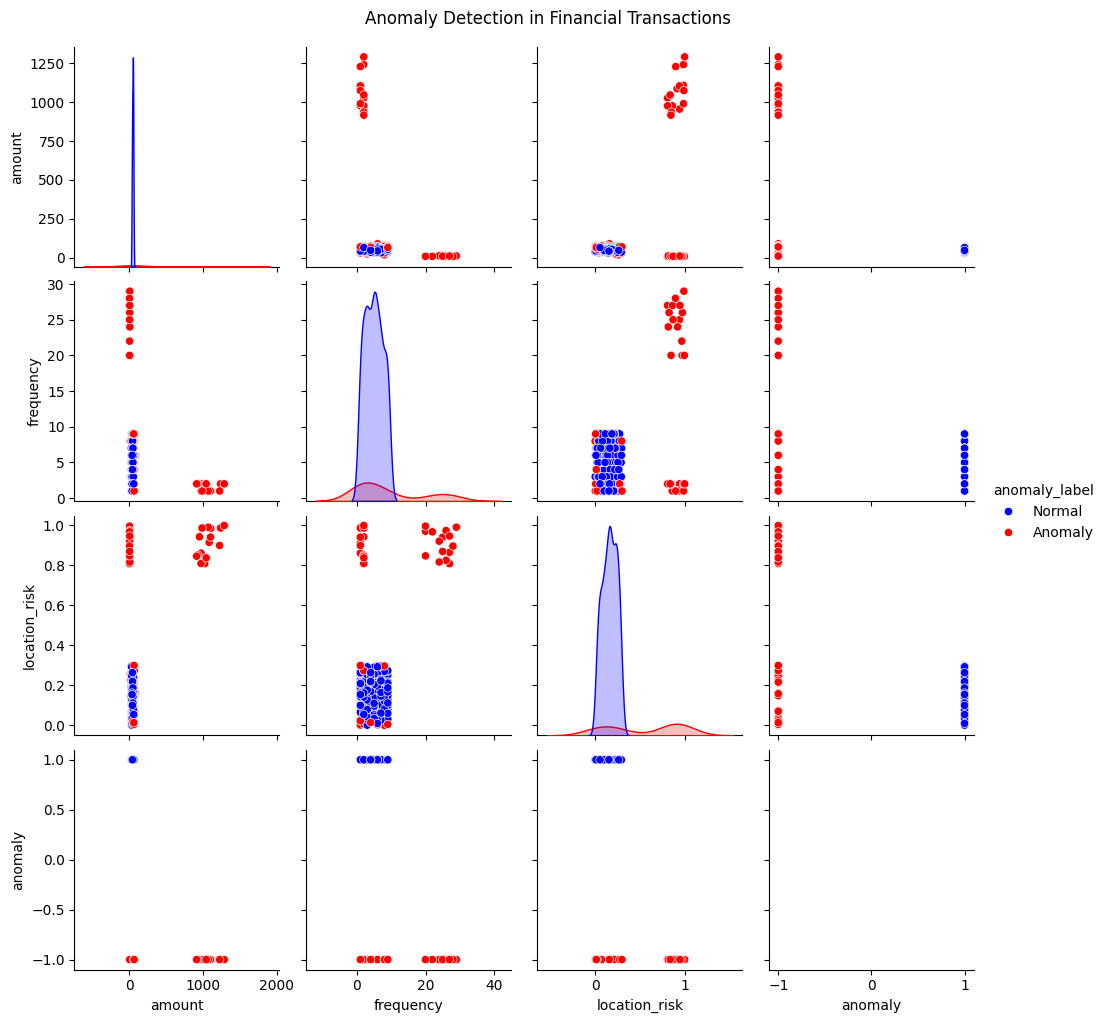

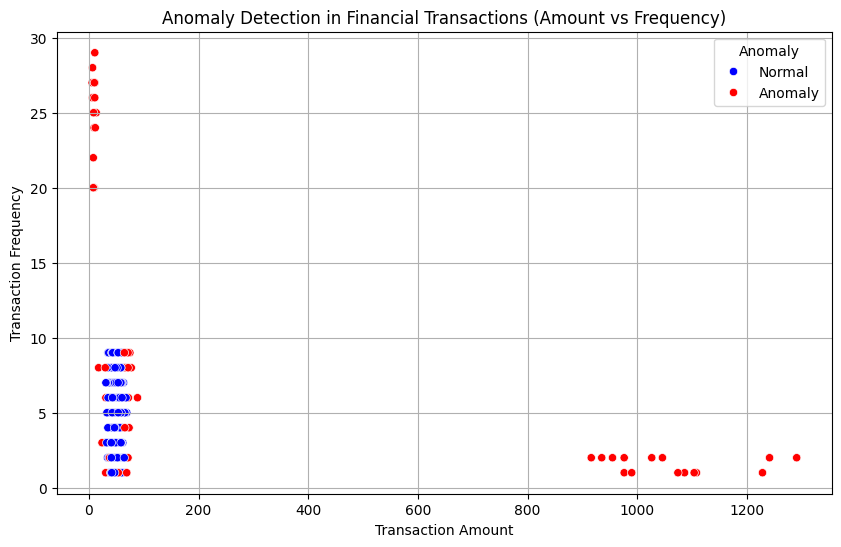

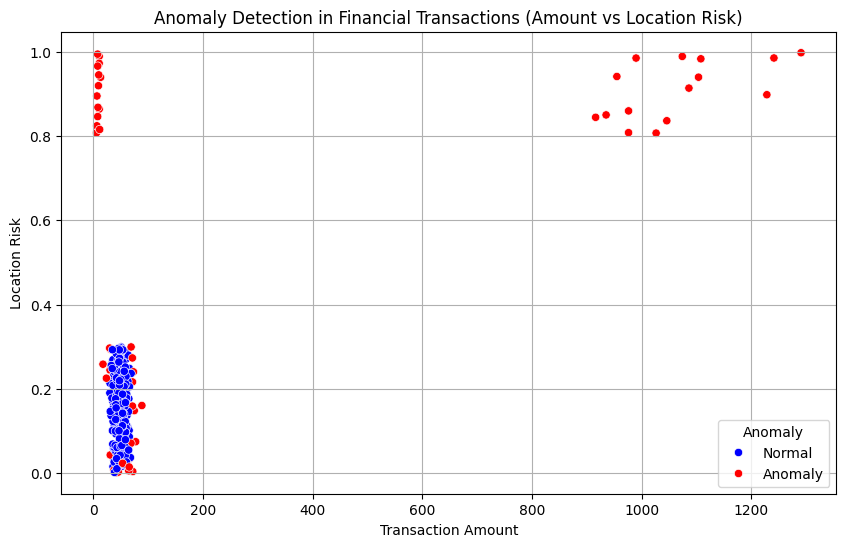

In [1]:
# Task: Anomaly Detection in Financial Transactions
# Steps:
# 1. Import Libraries
# 2. Load Dataset
# 3. Apply Isolation Forest
# 4. Visualize Anomalies

# 1. Import Libraries
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 2. Load Dataset
# For demonstration purposes, let's create a synthetic financial transaction dataset
import numpy as np
np.random.seed(42)
n_samples = 300
normal_transactions = pd.DataFrame({
    'amount': np.random.normal(50, 10, n_samples),
    'frequency': np.random.randint(1, 10, n_samples),
    'location_risk': np.random.uniform(0, 0.3, n_samples)
})
anomalous_transactions = pd.DataFrame({
    'amount': np.concatenate([np.random.normal(1000, 200, int(0.05 * n_samples)), np.random.normal(10, 2, int(0.05 * n_samples))]),
    'frequency': np.concatenate([np.random.randint(1, 3, int(0.05 * n_samples)), np.random.randint(20, 30, int(0.05 * n_samples))]),
    'location_risk': np.concatenate([np.random.uniform(0.8, 1, int(0.05 * n_samples)), np.random.uniform(0.8, 1, int(0.05 * n_samples))])
})

df = pd.concat([normal_transactions, anomalous_transactions], ignore_index=True)

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print("Synthetic Financial Transaction Dataset:")
print(df.head())

# 3. Apply Isolation Forest
# Initialize and fit the Isolation Forest model
model = IsolationForest(contamination='auto', random_state=42)
predictions = model.fit_predict(df)

# Add anomaly predictions to the DataFrame
df['anomaly'] = predictions
df['anomaly_label'] = df['anomaly'].map({1: 'Normal', -1: 'Anomaly'})

print("\nAnomaly counts:")
print(df['anomaly_label'].value_counts())

# 4. Visualize Anomalies
# Visualize anomalies using a pair plot of the features
sns.pairplot(df, hue='anomaly_label', palette={'Normal': 'blue', 'Anomaly': 'red'})
plt.suptitle('Anomaly Detection in Financial Transactions', y=1.02)
plt.show()

# Alternatively, visualize anomalies using two specific features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='amount', y='frequency', hue='anomaly_label', data=df, palette={'Normal': 'blue', 'Anomaly': 'red'})
plt.title('Anomaly Detection in Financial Transactions (Amount vs Frequency)')
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Frequency')
plt.legend(title='Anomaly')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='amount', y='location_risk', hue='anomaly_label', data=df, palette={'Normal': 'blue', 'Anomaly': 'red'})
plt.title('Anomaly Detection in Financial Transactions (Amount vs Location Risk)')
plt.xlabel('Transaction Amount')
plt.ylabel('Location Risk')
plt.legend(title='Anomaly')
plt.grid(True)
plt.show()